# Analyzing results

You will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt
# different styles are predefined that give different appearance to the plots.
# This one emulates the style of the figures you'll find on statisical 
# analysis news site fivethirtyeight.com
plt.style.use('fivethirtyeight')

In [2]:
# reading data stored in results.dat

file_name = 'results.dat'

# np.loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
# unpack=True transposes the array in order to be able to extract each column individually 
all_data = np.loadtxt(file_name, skiprows=1, unpack=True)

h_step = all_data[0]
analytic = all_data[1]
three_point = all_data[2]
five_point = all_data[3]
# Each one of these is a numpy array that contains one of the columns in the results.dat file.
# This will allows us to make operations on the extracted data

### Plotting the derivatives first

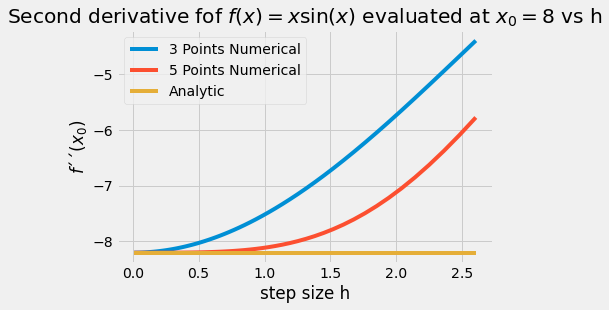

In [3]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates
plt.title('Second derivative fof $f(x)=x\sin(x)$ evaluated at $x_0 = 8$ vs h')
plt.plot(h_step, three_point, label='3 Points Numerical')
plt.plot(h_step, five_point, label='5 Points Numerical')
plt.plot(h_step, analytic, label='Analytic')
plt.xlabel('step size h')
# Strings can take LaTeX syntaxis and interpret it correctly by putting an 'r' right before it
plt.ylabel(r'$f´´(x_0)$')
# legend displays the labels given in each plot
plt.legend()
plt.show()

If you implemented the 5 points formula in you fortran code and uncommented the appropriate lines here you should be able to compare both approximations in this plot

### Plotting the errors
Now we will plot the error of the numerical formulas

In [4]:
# Operations between arrays of the same size are applied element-wise
three_point_error = np.absolute(analytic - three_point)
five_point_error = np.absolute(analytic - five_point)

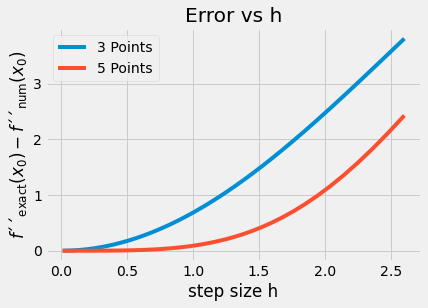

In [5]:
plt.title('Error vs h')
plt.plot(h_step, three_point_error, label='3 Points')
plt.plot(h_step, five_point_error, label='5 Points')
plt.xlabel('step size h')
plt.ylabel(r'$f´´_{\rm exact}(x_0) - f´´_{\rm num}(x_0)$')
plt.legend()
plt.show()

All we did was shift everything down to the $y=0$ axis. We're not getting much information out of it.

We expect the error $\Delta f''$ to go as a power of the step size $h$. 

$$ \Delta f'' = A h^n, $$

were $A$ is just some constant. Taking a logarithm on both sides of the equation results in

$$ \log(\Delta f'') = \log(A h^n) = \log(h^n) + \log(A) = n \log(h) + C,$$

where $C$ is just a constant renaming $\log(A)$. Therefore a log-log plot of the error should show a straight line. Let's see if that's the case

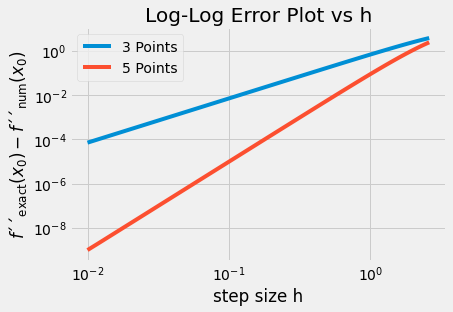

In [6]:
# For plotting we don't need to apply the log function ourselves; loglog takes care of that.
plt.title('Log-Log Error Plot vs h')
plt.loglog(h_step, three_point_error, label='3 Points')
plt.loglog(h_step, five_point_error, label='5 Points')
plt.xlabel('step size h')
plt.ylabel(r'$f´´_{\rm exact}(x_0) - f´´_{\rm num}(x_0)$')
plt.legend()
plt.show()

If you selected the right range for $h$ in your fortran code you should get straight lines in your log plot, but is the slope the correct one? Based on the lectures the error goes as $h^2$ for the 3 points formula and as $h^4$ for the five points formula. Therefore, the slopes should be 2 and 4. Tha can be verified with a simple linear regression

## Analyzing the data

There's several implementations of linear regression in python. We will use `linregress` from `scipy.stats`. You should check the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

In [7]:
# Importing only the stats package
from scipy import stats

In [8]:
# First we need to apply the log function to our data
log_h_step = np.log(h_step)
log_three_point_error = np.log(three_point_error)
log_five_point_error = np.log(five_point_error)

# I'll leave the rest of the implementation for you to do based on the documentation of stats.linregress 
# The example on the documentation should make it pretty clear how to extract the slope

result_3pt = stats.linregress(log_h_step,log_three_point_error)
result_5pt = stats.linregress(log_h_step,log_five_point_error)

## Print slope for linear regressions
print("The slope for the three point formula is:")
print(result_3pt.slope)
print("The slope for the five point formula is:")
print(result_5pt.slope)

The slope for the three point formula is:
1.9808953916111582
The slope for the five point formula is:
3.9488860791105784


### Is the slope what we expected from the error in both numerical derivatives?

We expect for the three point formula to have an error on the order of $h^2$. Using a linear regression would yield a slope of $m=2$. We conclude that the slope of the linear regression for the three point formula is what we expect.

Similarly, the error for the five point formula has terms on the order of $h^4$, so we expect the linear regression to yield a slope of $m=4$. From our output, we conclude that we yield the expected results.